# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
#https://www.geeksforgeeks.org/get-current-date-using-python/
from datetime import date
today=date.today()
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


In [3]:
cities[:10]

['saint-pierre',
 'dunaivtsi',
 'albany',
 'grytviken',
 'margaret river',
 'ayame',
 'yellowknife',
 'tazovsky',
 'semnan',
 'meulaboh']

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
#using this to look at dictionary keys
city=f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q=charlotte'
data=requests.get(city).json()
pprint(data,indent=2)

{ 'base': 'stations',
  'clouds': {'all': 40},
  'cod': 200,
  'coord': {'lat': 35.2271, 'lon': -80.8431},
  'dt': 1710992536,
  'id': 4460243,
  'main': { 'feels_like': 51.87,
            'humidity': 52,
            'pressure': 1014,
            'temp': 54.3,
            'temp_max': 58.73,
            'temp_min': 46.99},
  'name': 'Charlotte',
  'sys': { 'country': 'US',
           'id': 3648,
           'sunrise': 1710933979,
           'sunset': 1710977701,
           'type': 1},
  'timezone': -14400,
  'visibility': 10000,
  'weather': [ { 'description': 'scattered clouds',
                 'icon': '03n',
                 'id': 802,
                 'main': 'Clouds'}],
  'wind': {'deg': 340, 'speed': 3.44}}


In [5]:
# Set the API base URL

url ="http://api.openweathermap.org/data/2.5/weather?"

query_url = f"{url}appid={weather_api_key}&units=metric&q="
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =(query_url + city)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint-pierre
Processing Record 2 of Set 1 | dunaivtsi
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | margaret river
Processing Record 6 of Set 1 | ayame
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | tazovsky
Processing Record 9 of Set 1 | semnan
Processing Record 10 of Set 1 | meulaboh
Processing Record 11 of Set 1 | callaway
Processing Record 12 of Set 1 | dudinka
Processing Record 13 of Set 1 | taoudenni
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | kokopo
Processing Record 16 of Set 1 | luderitz
Processing Record 17 of Set 1 | carnarvon
Processing Record 18 of Set 1 | buraydah
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | longyearbyen
Processing Record 21 of Set 1 | sinop
Processing Record 22 of Set 1 | codrington
Processing R

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saint-pierre,-21.3393,55.4781,25.82,69,0,2.06,RE,1710992827
1,dunaivtsi,48.8891,26.8564,0.75,97,100,5.42,UA,1710992827
2,albany,42.6001,-73.9662,-2.02,68,39,1.34,US,1710992783
3,grytviken,-54.2811,-36.5092,2.20,87,100,3.30,GS,1710992828
4,margaret river,-33.9500,115.0667,24.46,38,0,3.86,AU,1710992599


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saint-pierre,-21.3393,55.4781,25.82,69,0,2.06,RE,1710992827
1,dunaivtsi,48.8891,26.8564,0.75,97,100,5.42,UA,1710992827
2,albany,42.6001,-73.9662,-2.02,68,39,1.34,US,1710992783
3,grytviken,-54.2811,-36.5092,2.20,87,100,3.30,GS,1710992828
4,margaret river,-33.9500,115.0667,24.46,38,0,3.86,AU,1710992599


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

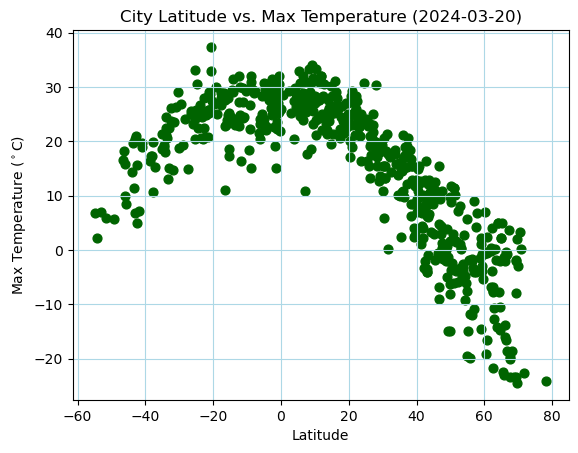

In [10]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(['Lat'],['Max Temp'],xlabel='Latitude',ylabel='Max Temperature ($^\circ$C)',title=f'City Latitude vs. Max Temperature ({today})',
                          color='darkgreen',s=40)

# Incorporate the other graph properties
plt.grid(color='lightblue')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

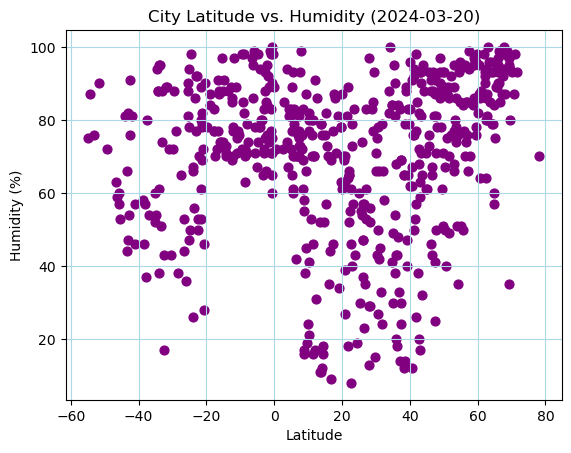

In [11]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(['Lat'],['Humidity'],xlabel='Latitude',ylabel='Humidity (%)',title=f'City Latitude vs. Humidity ({today})',color='purple',s=40)

# Incorporate the other graph properties
plt.grid(color='lightblue')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

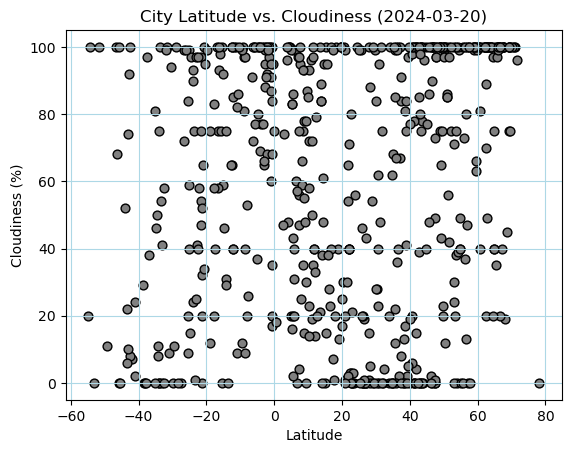

In [12]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(['Lat'],['Cloudiness'],xlabel='Latitude',ylabel='Cloudiness (%)',title=f'City Latitude vs. Cloudiness ({today})',color='grey',
                          edgecolors='black',s=40)
# Incorporate the other graph properties
plt.grid(color='lightblue')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

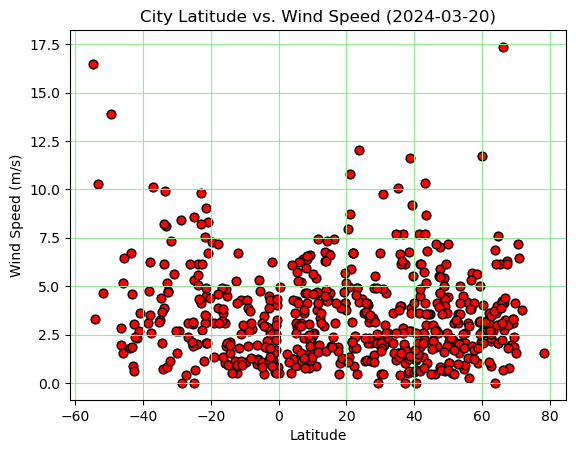

In [13]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(['Lat'],['Wind Speed'],xlabel='Latitude',ylabel='Wind Speed (m/s)',title=f'City Latitude vs. Wind Speed ({today})',color='red',
                          edgecolors='black',s=40)

# Incorporate the other graph properties
plt.grid(color='lightgreen')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
#dataframe=choose data frame
#stat= choose between max temp, humidity, cloudiness,etc
#x1=x coordinate for equation on graph
#y1=y coordinate for equation on graph
def get_linregress_lat_vs(dataframe,stat,x1,y1):
    results_list=st.linregress(dataframe['Lat'],dataframe[stat])
    slope=results_list[0]
    intercept=results_list[1]
    r_value=round(results_list[2],2)
    x=[dataframe['Lat'].min(),dataframe['Lat'].max()]
    y_pred=slope*np.array(x)+intercept
    dataframe.plot.scatter(['Lat'],[stat],xlabel='Latitude',ylabel=stat ,title=f'City Latitude vs. {stat} ({today})',color='blue')
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,(x1,y1),fontsize=12,color="red")
    plt.grid()
    plt.plot(x,y_pred,color='red')
    return plt.show()
    

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[(city_data_df['Lat']>=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,dunaivtsi,48.8891,26.8564,0.75,97,100,5.42,UA,1710992827
2,albany,42.6001,-73.9662,-2.02,68,39,1.34,US,1710992783
5,ayame,5.6083,-3.1563,24.73,93,43,0.92,CI,1710992829
6,yellowknife,62.4560,-114.3525,-21.71,64,20,2.57,CA,1710992588
7,tazovsky,67.4667,78.7000,-19.60,94,100,6.31,RU,1710992830


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[(city_data_df['Lat']<0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saint-pierre,-21.3393,55.4781,25.82,69,0,2.06,RE,1710992827
3,grytviken,-54.2811,-36.5092,2.20,87,100,3.30,GS,1710992828
4,margaret river,-33.9500,115.0667,24.46,38,0,3.86,AU,1710992599
13,puerto natales,-51.7236,-72.4875,5.87,90,100,4.66,CL,1710992827
14,kokopo,-4.3520,152.2633,28.28,78,100,3.44,PG,1710992832


###  Temperature vs. Latitude Linear Regression Plot

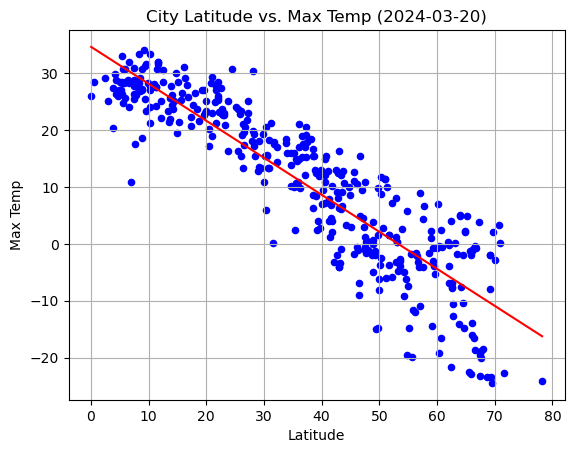

In [17]:
# Linear regression on Northern Hemisphere
get_linregress_lat_vs(northern_hemi_df,'Max Temp',0,-30)


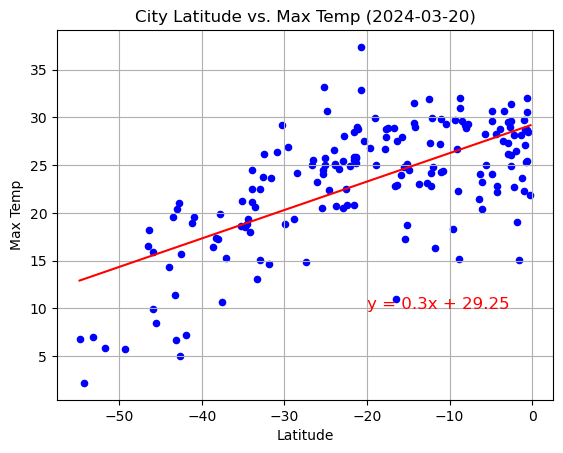

In [18]:
# Linear regression on Southern Hemisphere
get_linregress_lat_vs(southern_hemi_df,'Max Temp',-20,10)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

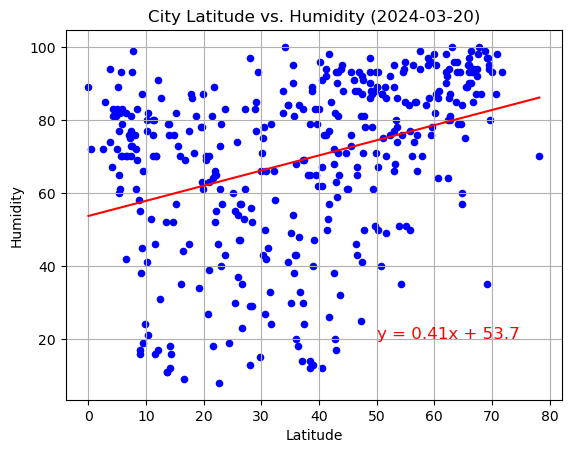

In [19]:
# Northern Hemisphere
get_linregress_lat_vs(northern_hemi_df,'Humidity',50,20)

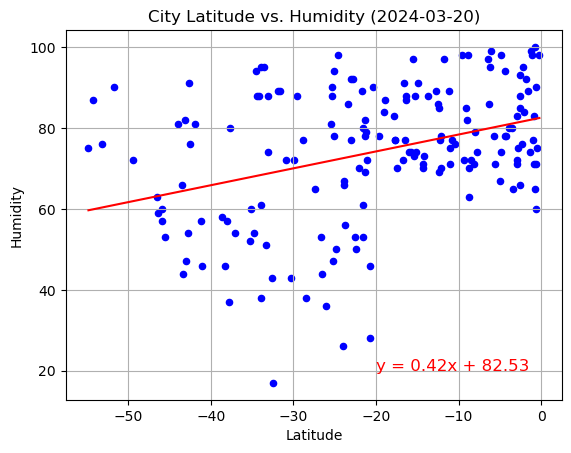

In [20]:
# Southern Hemisphere
get_linregress_lat_vs(southern_hemi_df,'Humidity',-20,20)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

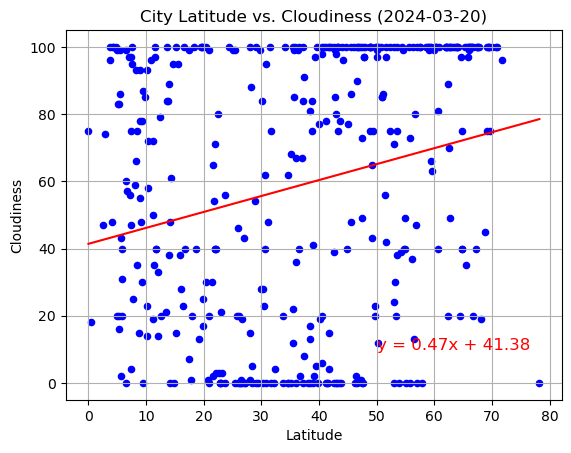

In [21]:
# Northern Hemisphere
get_linregress_lat_vs(northern_hemi_df,'Cloudiness',50,10)

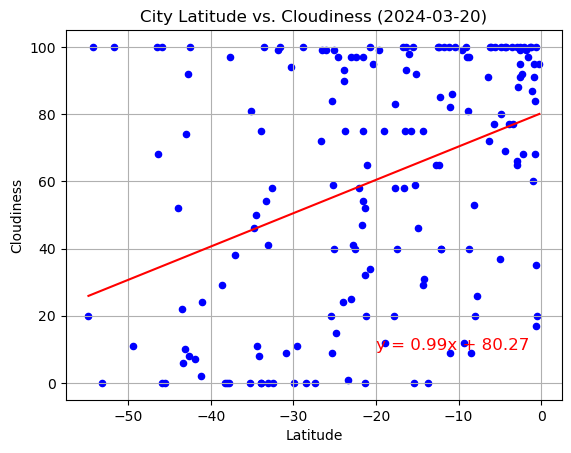

In [22]:
# Southern Hemisphere
get_linregress_lat_vs(southern_hemi_df,'Cloudiness',-20,10)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

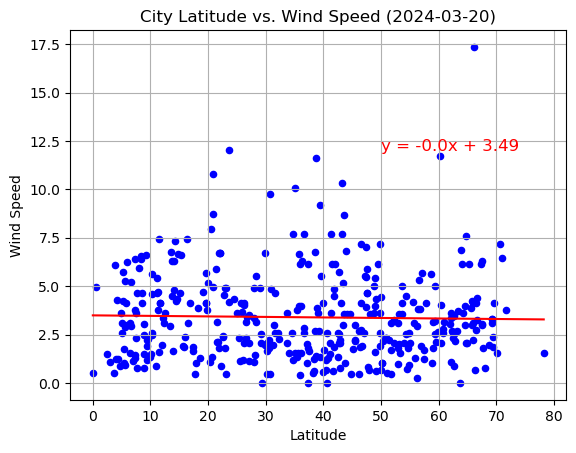

In [23]:
# Northern Hemisphere
get_linregress_lat_vs(northern_hemi_df,'Wind Speed',50,12)

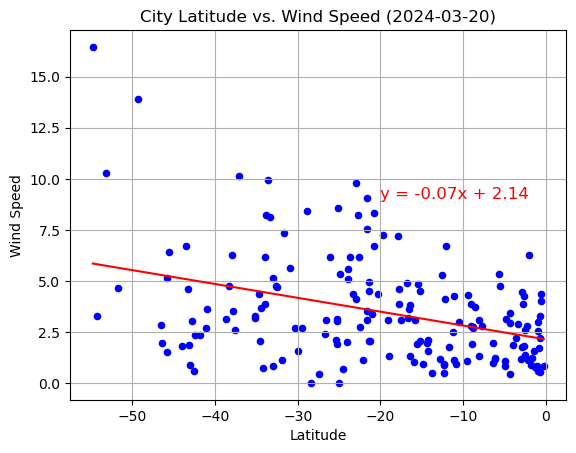

In [24]:
# Southern Hemisphere
get_linregress_lat_vs(southern_hemi_df,'Wind Speed',-20,9)

**Discussion about the linear relationship:** YOUR RESPONSE HERE